In [1]:
import pystan
import arviz
import random
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(csv_file_path):
    data = []
    with open(csv_file_path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter='\n')
        for row in reader:
            data.append(row)
    return from_str_to_int(data)

In [3]:
def translate_str_to_int(string):
    return 0 if string == ['false'] else 1

def from_str_to_int(str_lst):
    return list(map(translate_str_to_int, str_lst))

In [4]:
def list_to_data(y):
    return {
        'N': len(y),
        'y':y
    }

In [5]:
mixture_model = """

data {
    int<lower=0> N; // number of people answered the survey
    int<lower=0, upper = 1> y[N]; // boolean array of answers
}

parameters {
    real<lower=0, upper=1> theta; // the latent variable we want to infer
}


model {
    theta ~ beta(0.5, 0.5); // beta prior
    for (i in 1:N){
        target +=
            log_mix(0.5, bernoulli_lpmf(y[i] | theta), bernoulli_lpmf(y[i] | 0.5));
    }
    
}
"""

<b>Data loading</b>

In [6]:
one_third_data = load_data('../resource/survey_one_third_data.csv')
half_data = load_data('../resource/survey_half_data.csv')
two_third_data = load_data('../resource/survey_two_third_data.csv')

<b>Plot the data </b>

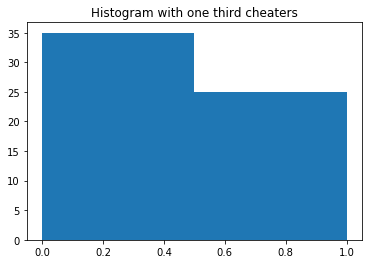

In [7]:
plt.hist(one_third_data, bins=2)
plt.title("Histogram with one third cheaters")
plt.show()

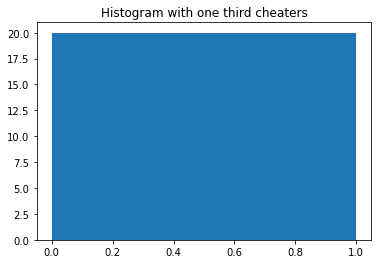

In [8]:
plt.hist(half_data, bins=2)
plt.title("Histogram with one third cheaters")
plt.show()

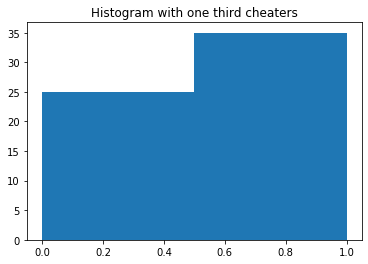

In [9]:
plt.hist(two_third_data, bins=2)
plt.title("Histogram with one third cheaters")
plt.show()

<b>running the infernce on each data set </b>

In [10]:
compiled_model = pystan.StanModel(model_code=mixture_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1faba59f95facd8bf45fceea85f1353e NOW.


<b>One Third Data</b>

In [22]:
%%timeit -n 10
fit = compiled_model.sampling(list_to_data(one_third_data))

2.07 s ± 64.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
print(fit)

Inference for Stan model: anon_model_1faba59f95facd8bf45fceea85f1353e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.32  3.8e-3   0.13   0.08   0.24   0.32   0.41   0.58   1114    1.0
lp__   -42.1    0.03   0.88 -44.52 -42.27 -41.76 -41.56  -41.5    833    1.0

Samples were drawn using NUTS at Sat May  2 14:38:16 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000193399CBB08>,
      dtype=object)

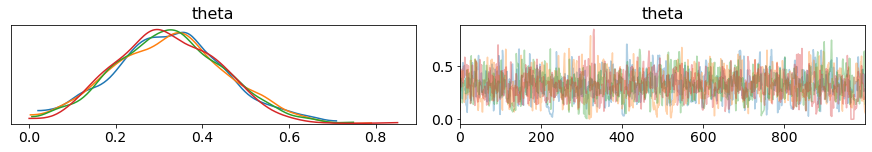

In [13]:
arviz.plot_trace(fit)

<b>Half Data</b>

In [14]:
fit = compiled_model.sampling(data =list_to_data(half_data))

In [15]:
print(fit)

Inference for Stan model: anon_model_1faba59f95facd8bf45fceea85f1353e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.51  4.2e-3   0.16   0.18   0.39   0.51   0.62   0.82   1511    1.0
lp__  -29.05    0.03   0.91 -31.61 -29.24  -28.7 -28.48 -28.42   1298    1.0

Samples were drawn using NUTS at Sat May  2 14:38:19 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019339923B48>,
      dtype=object)

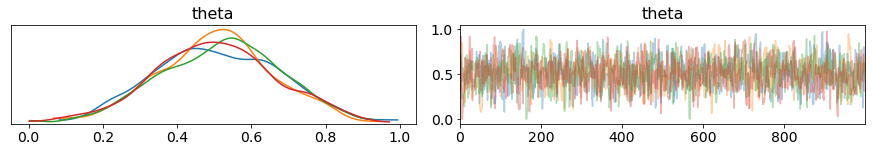

In [16]:
arviz.plot_trace(fit)

<b>Two Third Data</b>

In [17]:
fit = compiled_model.sampling(data =list_to_data(two_third_data))

In [18]:
print(fit)

Inference for Stan model: anon_model_1faba59f95facd8bf45fceea85f1353e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.67  3.9e-3   0.13   0.41   0.58   0.68   0.77   0.92   1127    1.0
lp__  -42.14    0.03   0.94 -44.74 -42.32 -41.78 -41.56  -41.5    790    1.0

Samples were drawn using NUTS at Sat May  2 14:38:22 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019338DF7048>,
      dtype=object)

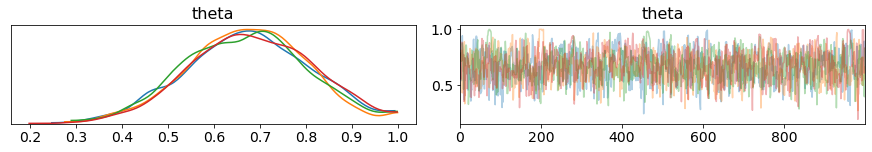

In [19]:
arviz.plot_trace(fit)